<a href="https://colab.research.google.com/github/maral96/Data_Exploration_BC/blob/main/Maral_Sci_Associate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Dataset

Let assume a clinician interested in training a machine learning model to predict breast cancer diagnosis. Their dataset includes fine needle aspirate samples of breast mass from 569 patients and derived 30 imaging features describing size, shape, and texture of the suspected mass. 

Column `target` indicates whether the mass is malignant (1) or benign (0). 


# Data Exploration

1.   Which feature(s) do you think will be **most** predictive/correlative of 
malignancy? 
2.   Which feature(s) do you think will be **least** predictive/correlative of malignancy?
3.   What feature(s) and/or patient(s), if any, contain outliers, inconsistencies, or require clarification with a clinician or colleague?   

In [ ]:
# imports
import numpy as np
import pandas as pd
import scipy 

from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns

from collections import Counter

from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [ ]:
df = load_breast_cancer(as_frame=True)['frame']
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Exploration: Basics

Q: Any missing values? <br/>
A: Negative.

In [ ]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


## Exploration: Data distributions

Objective: better high-level familiarity with the dataset

Q: Do we have imbalanced classes? <br/>
A: Roughly 2:1 so not extreme, but should be taken into account

Text(0.5, 1.0, 'Class Distribution')

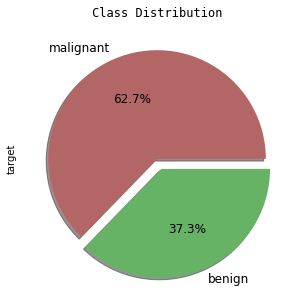

In [ ]:
#--  Class Distribution (Is there class imbalanced?)
count = df.target.value_counts()
ax=count.plot(kind='pie', labels=['malignant','benign'],
              colors=[(.7,0.4,.4),(.4,.7,.4)],fontsize = 'large',
              explode=(0, 0.1), shadow=True, autopct='%1.1f%%',
              figsize=(5,5))
ax.set_title("Class Distribution",fontsize = 'large', fontfamily='monospace')

Q: How is each individual feature distributed? <br/>
A: Plot below (Some are rouhgly bell-shaped, some roughly exponential, a few have pretty sharp distributions around the mode, ...)

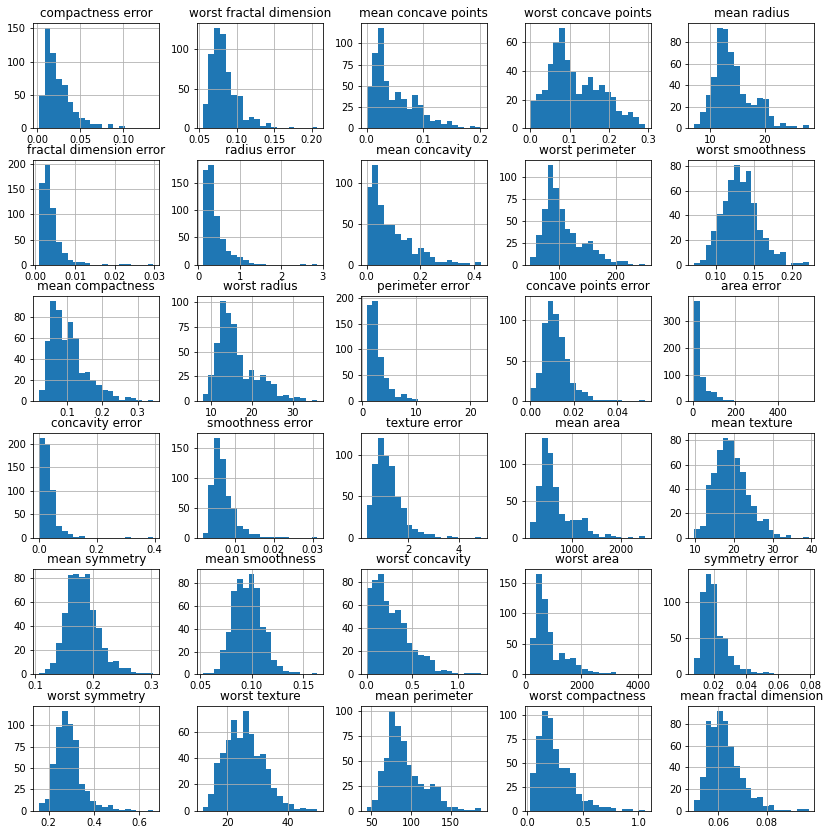

In [ ]:
plt.rcParams['figure.figsize'] = [14, 17]
df[set(df.columns) - {'target'}].hist(layout=(7,5), bins=20)
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

## Exploration: Feature correlation

Q: How correlated the features are? Are all features adding new information? <br/>
A: Some feature pairs are highly correlated, in some cases nearly linear

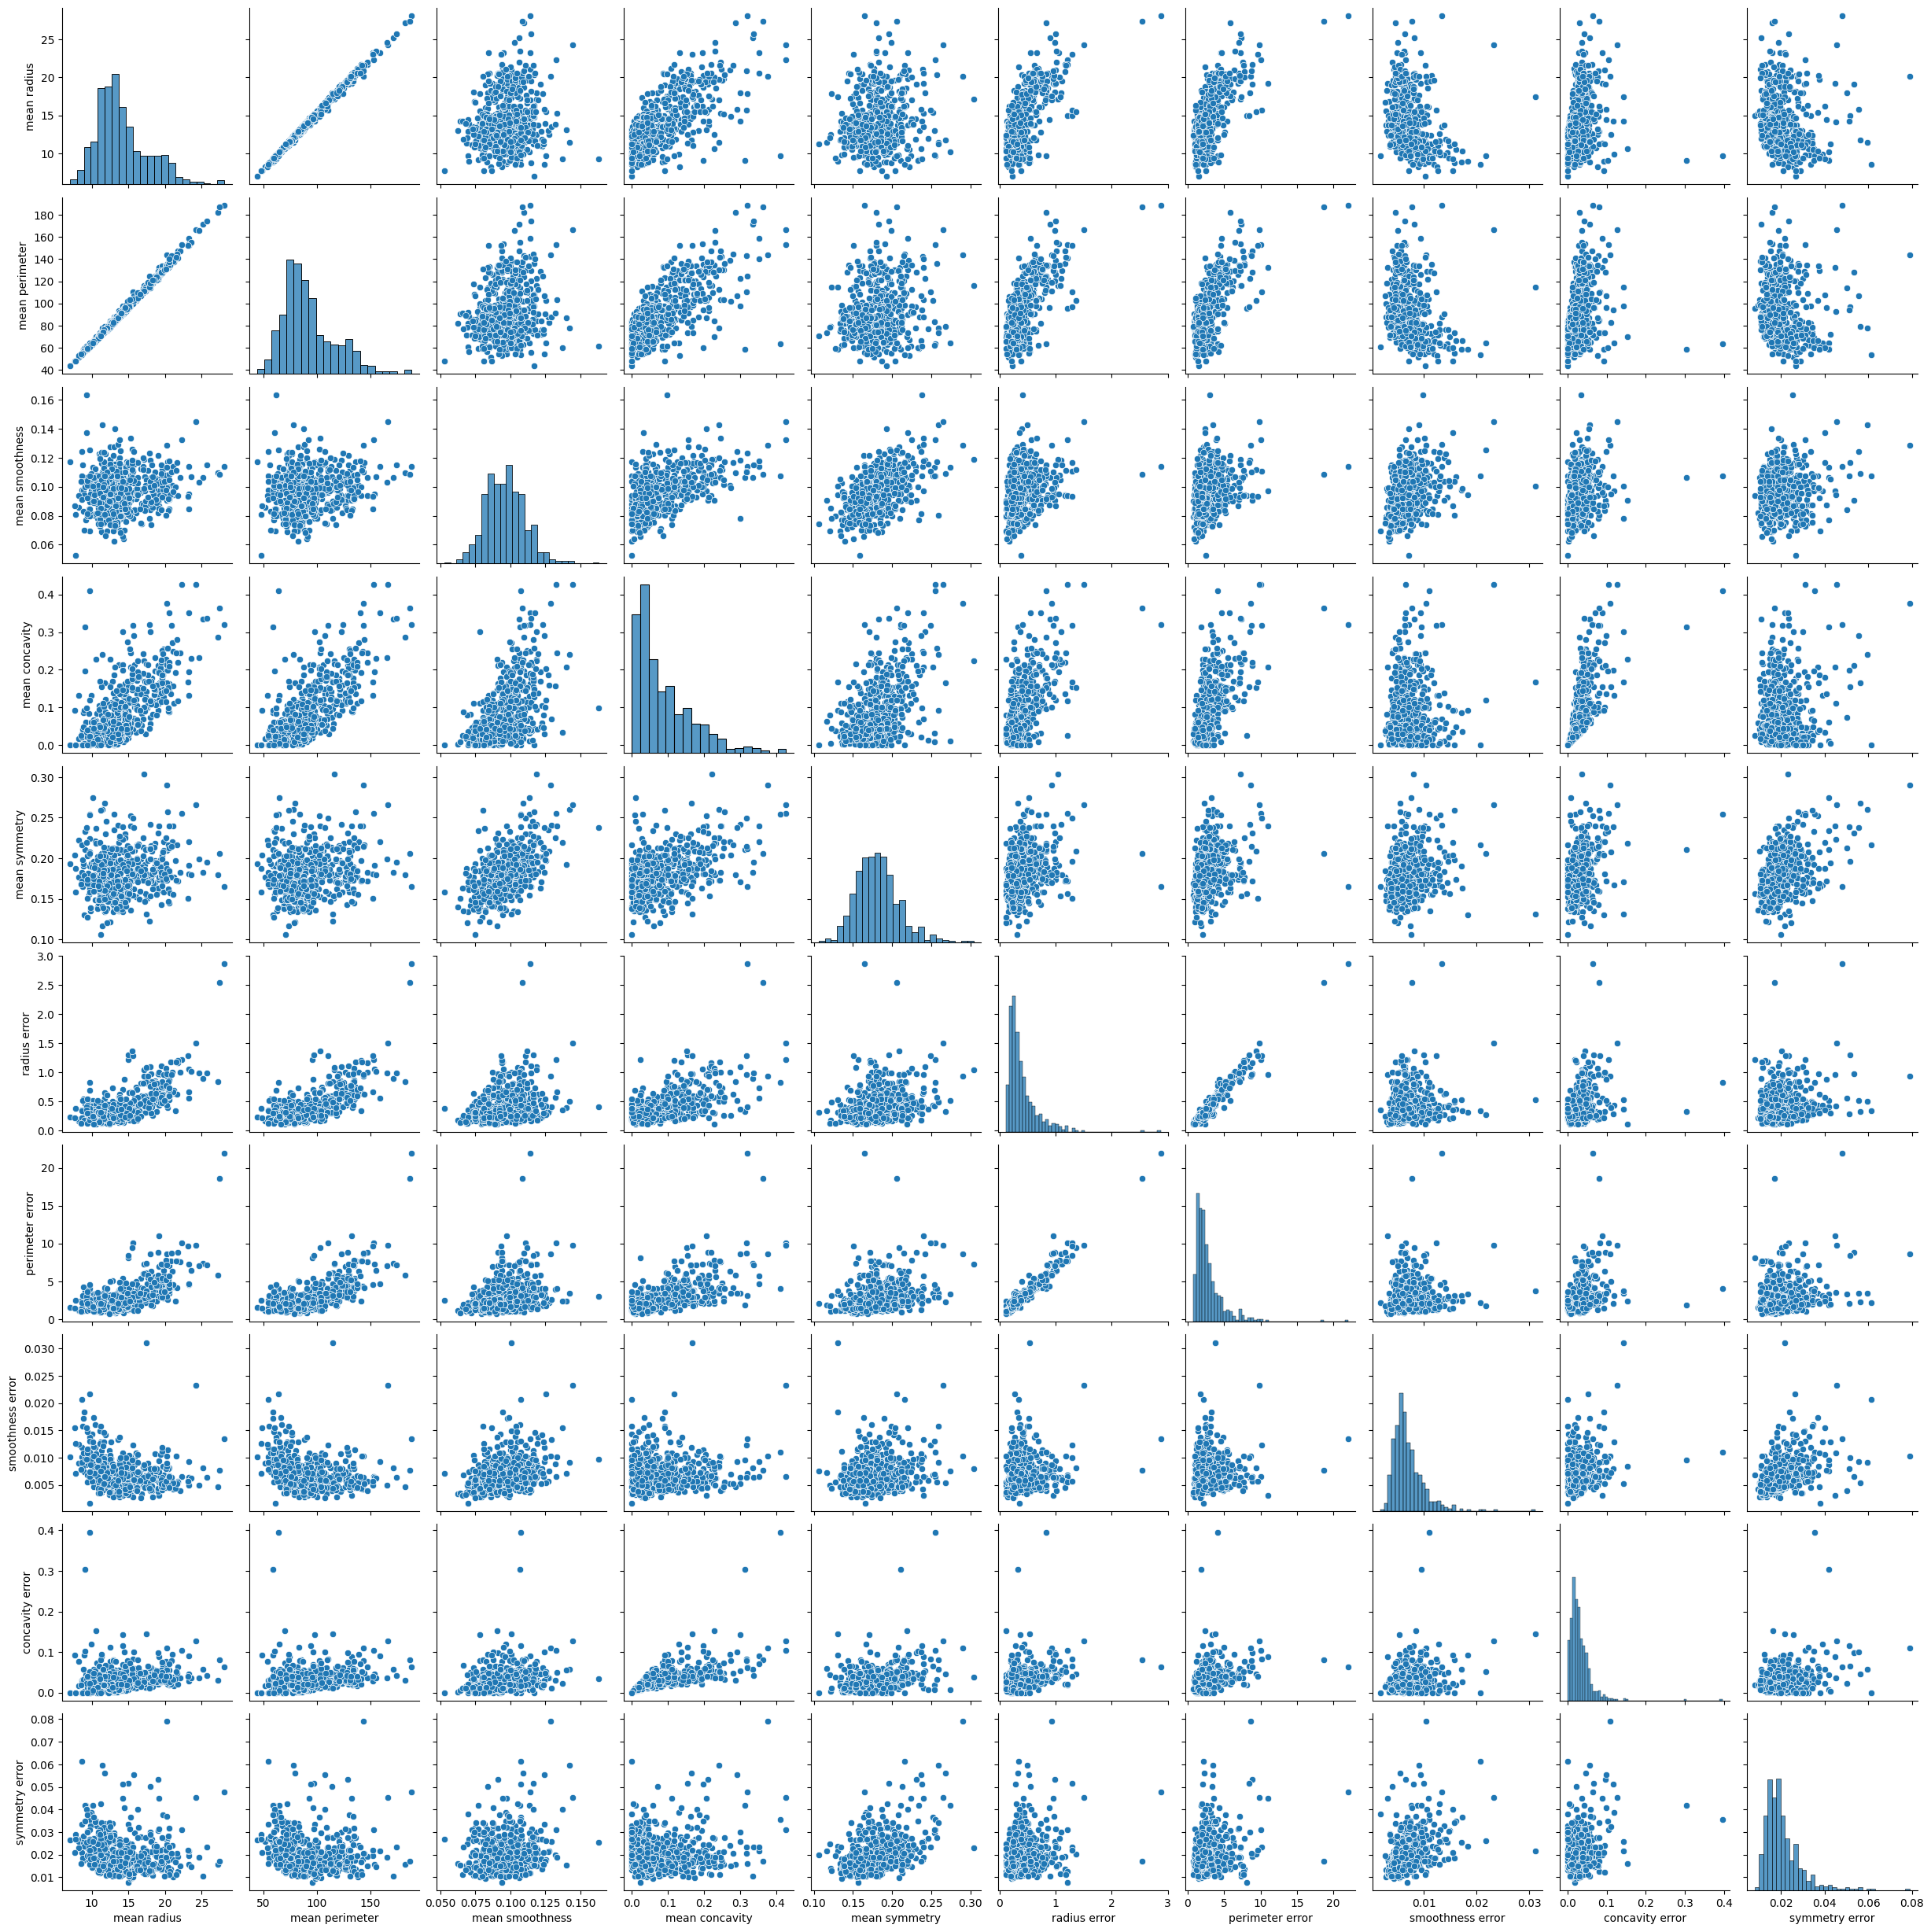

In [ ]:
sns.pairplot(df[df.columns[0:20:2]]) #randomly selecting a few features for visualization purposes

Q: Are some features actually linearly correlated with one another?
* Multicollinearity occurs when one independent variable is linearly correlated with another independent variable

A: Yes, matrix determinant is zero. Also, the heatmap map of corrolation matrix supports this observation.

In [ ]:
featuresList = list(df.drop(['target'],axis=1))
featuresMat= df.values[:,:-1]
print(featuresMat.shape)
print('determinant', np.linalg.det(np.dot(featuresMat,featuresMat.T)))

(569, 30)
determinant 0.0


In [ ]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,Z-score
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029,0.543610
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185,0.194721
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636,0.547885
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984,0.653780
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560,0.163925
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534,0.297435
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360,0.452449
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614,0.518441
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499,0.142958
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838,-0.019193


### Correlation heatmap

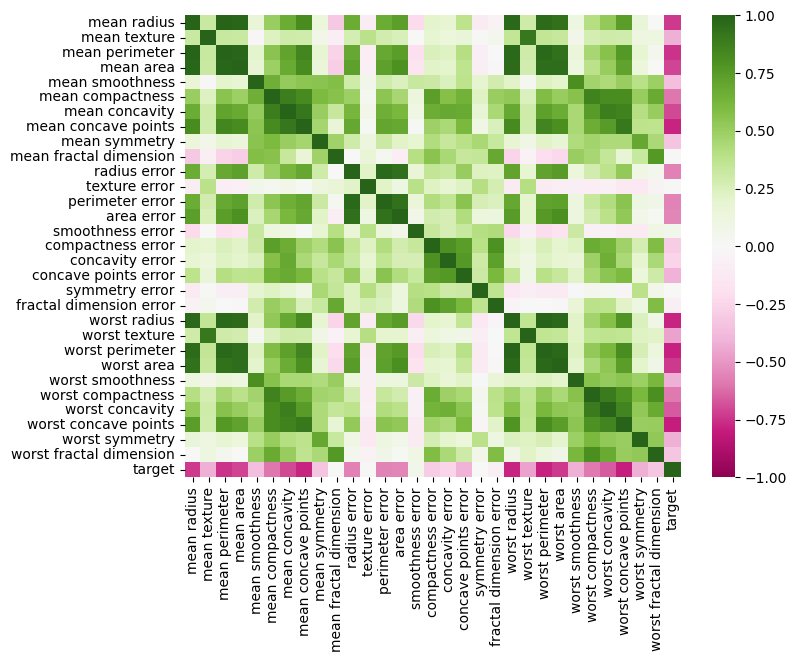

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=False,vmin=-1.0, vmax=1.0,cmap='PiYG')

Q. How to fix the multicollinearity?

A. PCA, tree-based feature selection

PCA to resolve corrolated features

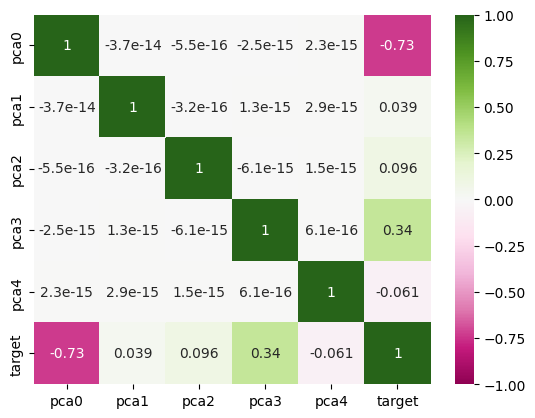

In [ ]:
X = df.drop(['target'],axis=1)
y = df[['target']]
n_cp=5
pca = PCA(n_components = n_cp)
pca.fit(X)
PCA_df = pd.DataFrame(pca.transform(X),columns=['pca'+str(i) for i in range(n_cp)])
PCA_df['target']= y
sns.heatmap(PCA_df.corr(),annot=True,vmin=-1.0, vmax=1.0,cmap='PiYG')

# Feature Analysis

Objective: understanding which features are more important, which features convey less information, and which features require clarification.

## Correlation metric

One pretty intuitive way to rank feature importance is by getting each feature's correlation with target values:

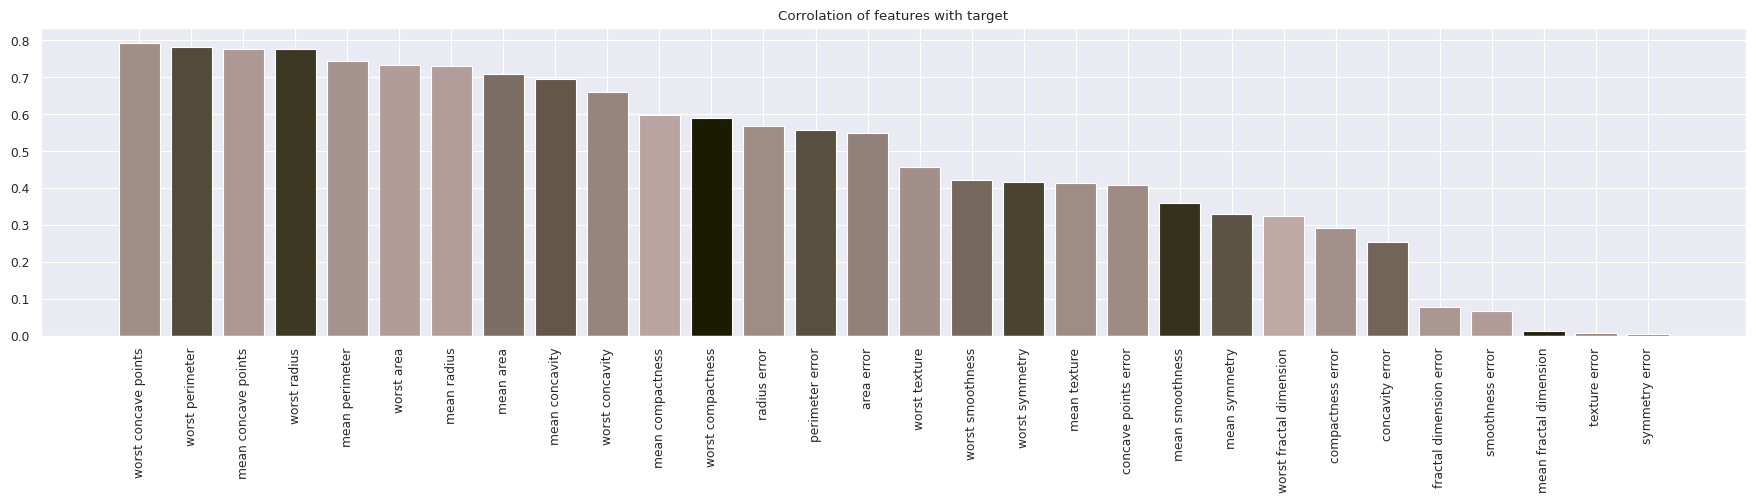

In [ ]:
dicCorrwithTarget = {} # a dictinary of features(attributes) to their corrolation with output
for featureName in list(df.drop(['target'],axis=1)):
  dicCorrwithTarget[featureName] = abs(df['target'].corr(df[featureName]))

#--visualize 
sns.set_theme(style="darkgrid",context="paper")
plt.figure(figsize=(22,4))
colorPlate=[(0.7*r+0.1, 0.6*r+0.1, 0.7*r)\
            for r in np.random.random(len(dicCorrwithTarget))]

_sorted = dict(sorted(dicCorrwithTarget.items(), key=lambda item: item[1],reverse=True))
plt.bar(list(_sorted.keys()), _sorted.values(), color=colorPlate)
plt.xticks(rotation = 90)
plt.title("Corrolation of features with target")
plt.show()

By this metric, the top 10 and bottom 5 features are as follows:

In [ ]:
#--- find most corrolated feature to output
n=10  #number in Top-n retreival
print(' Top-{} Most predictive features:'.format(n))
topFeaturesDict= dict(Counter(dicCorrwithTarget).most_common(n))
for i, (key, value) in enumerate(topFeaturesDict.items()):
  print("{}- '{}': {:.3f}".format(i+1, key, value))

#--- find least corrolated feature to output
n=5
print('\n\n Bottom-{} Least predictive features:'.format(n))
worstFeaturesDict = dict(Counter(dicCorrwithTarget).most_common()[:-n-1:-1])
for i, (key, value) in enumerate(worstFeaturesDict.items()):
  print("{}- '{}':{:.3f}".format(i+1, key, value))

 Top-10 Most predictive features:
1- 'worst concave points': 0.794
2- 'worst perimeter': 0.783
3- 'mean concave points': 0.777
4- 'worst radius': 0.776
5- 'mean perimeter': 0.743
6- 'worst area': 0.734
7- 'mean radius': 0.730
8- 'mean area': 0.709
9- 'mean concavity': 0.696
10- 'worst concavity': 0.660


 Bottom-5 Least predictive features:
1- 'symmetry error':0.007
2- 'texture error':0.008
3- 'mean fractal dimension':0.013
4- 'smoothness error':0.067
5- 'fractal dimension error':0.078


#### Visualize pairwise relationships between top and worst features

The following shows that two `top` features are well descriminative, 
however, it is not easy to find the boundary using `worst` features.


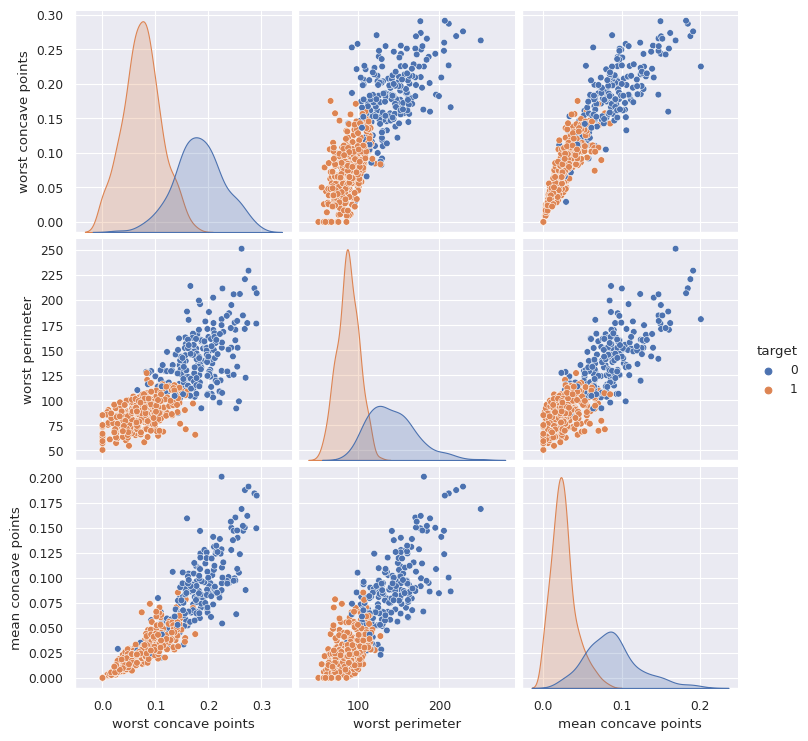

In [ ]:
df_most_importants = df[list(topFeaturesDict.keys())[:3] + ['target']] 
sns.pairplot(df_most_importants, hue="target")

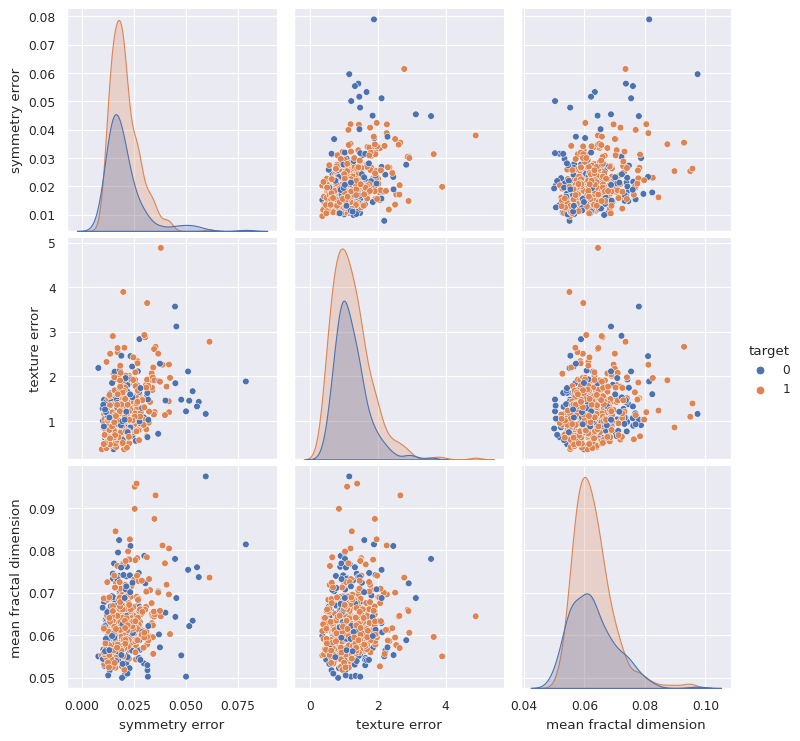

In [ ]:
df_least_importants = df[list(worstFeaturesDict.keys())[:3] + ['target']]
sns.pairplot(df_least_importants, hue="target")

## Tree-based feature selection

### Gini Importance

Mean Decrease in Impurity aka [Gini importance](https://medium.com/the-artificial-impostor/feature-importance-measures-for-tree-models-part-i-47f187c1a2c3#:~:text=It%20is%20sometimes%20called%20%E2%80%9Cgini,all%20trees%20of%20the%20ensemble.) is also a very useful tool in ranking feature importance, based on decision tree semantics:

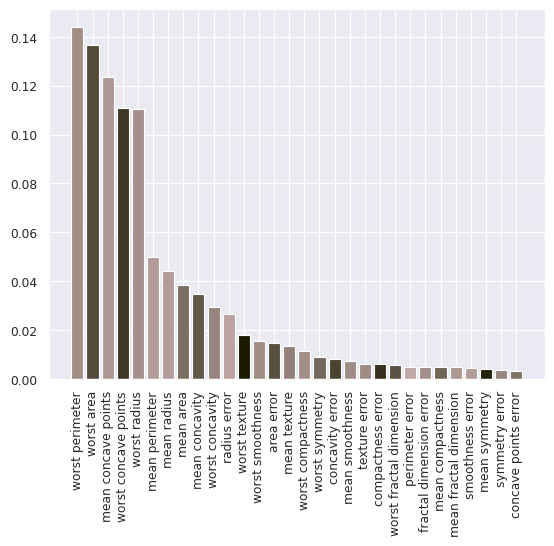

In [ ]:
# separate features and target
_features = df[set(df.columns) - {'target'}]
X, y = _features.to_numpy(), df['target'].to_numpy()

# train random forest on all data (no splitting required here)
forest = RandomForestClassifier(random_state=0)
forest.fit(X, y)

# get Gini importance
importances = forest.feature_importances_

# plot
_sorted = sorted(zip(_features.columns, importances), key=lambda x: x[1], reverse=True)
plt.bar([x[0] for x in _sorted], [x[1] for x in _sorted], color = colorPlate)
plt.xticks(rotation=90)
plt.show()

## Other feature selection methods: chi2
* an statistical method to measure feature importance

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

# pick top 10 per Chi2
X,y = df.drop(['target'], axis=1), df.target
select_k_best_classifier = SelectKBest(chi2, k=10)
select_k_best_classifier.fit(X, y)
selected = X.columns[select_k_best_classifier.get_support()]

print("Top 10 features:")
print("\n".join(f"{i+1:>3} - {s}" for i, s in enumerate(selected)))

# for bottom 5, pick top 25 and list the ones not selected
select_k_worst_classifier = SelectKBest(chi2, k=25)
select_k_worst_classifier.fit(X, y)
selected = set(X.columns) - set(X.columns[select_k_worst_classifier.get_support()])

print("\nBottom 5 features:")
print("\n".join(f"{i+1:>3} - {s}" for i, s in enumerate(selected)))

Top 10 features:
  1 - mean radius
  2 - mean texture
  3 - mean perimeter
  4 - mean area
  5 - perimeter error
  6 - area error
  7 - worst radius
  8 - worst texture
  9 - worst perimeter
 10 - worst area

Bottom 5 features:
  1 - symmetry error
  2 - smoothness error
  3 - texture error
  4 - fractal dimension error
  5 - mean fractal dimension


⇒ Pretty similar rankings altogether

# 3.  Outliers and Inconsistencies

Q. What feature(s) and/or patient(s), if any, contain outliers, inconsistencies, or require clarification with a clinician or colleague?  

A. Proposed approach: Z-score 

 ##### T-SNE visualization

 * project 30-dimentional feature space into 2D for visualization
 * Indicates some potential outliers   

[Text(0.5, 1.0, 'Breast Cancer Dataset t-SNE projection')]

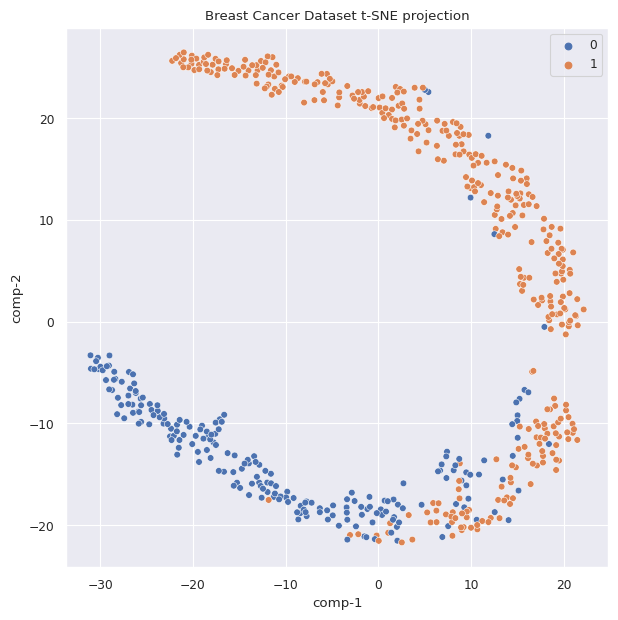

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE()

#--Apply PCA
X = df.drop(['target'],axis=1)
y = df[['target']]
pca = PCA(n_components = 5)#30->5
pca.fit(X)
X_embedded= pca.transform(X)

tsne = TSNE(n_components=2, learning_rate='auto', init='random')
z = tsne.fit_transform(X_embedded) 

tsne_df = pd.DataFrame()
tsne_df['y']= y
tsne_df["comp-1"] = z[:,0]
tsne_df["comp-2"] = z[:,1]

#--plot t-SNE
plt.figure(figsize=(7,7))
sns.scatterplot(data=tsne_df,x="comp-1", y="comp-2", hue=tsne_df.y.tolist()).set(
    title="Breast Cancer Dataset t-SNE projection")

## Z-score
* Z-score isa statistical measure that indicates how far is a data point from the rest of the dataset, e.g.,  a Z-score of 2 means that an observation is two standard deviations far from the mean. 
*  Z-scores of greater than three are usually considered potential outliers in the literature of ML.

In [ ]:
featuresList = list(df.drop(['target'],axis=1))
for cln in featuresList:
  print(cln, end='\t')
  zScoros= np.abs(scipy.stats.zscore(list(df[cln])))
  potentials = np.where(zScoros>3)[0]#potential outliers

  if len(potentials)>0:
    print('#',len(potentials),":", potentials)
  else:
    print('no outlier detected')

mean radius	# 5 : [ 82 180 212 352 461]
mean texture	# 4 : [219 232 239 259]
mean perimeter	# 7 : [ 82 122 180 212 352 461 521]
mean area	# 8 : [ 82 122 180 212 339 352 461 521]
mean smoothness	# 5 : [  3 105 122 504 568]
mean compactness	# 9 : [  0   3  78  82 108 122 181 258 567]
mean concavity	# 9 : [ 78  82 108 122 152 202 352 461 567]
mean concave points	# 6 : [ 82 108 122 180 352 461]
mean symmetry	# 5 : [ 25  60  78 122 146]
mean fractal dimension	# 7 : [  3  71 152 318 376 504 505]
radius error	# 7 : [122 138 212 258 417 461 503]
texture error	# 9 : [ 12  83 122 192 416 473 557 559 561]
perimeter error	# 8 : [ 12 108 122 212 258 417 461 503]
area error	# 6 : [122 212 265 368 461 503]
smoothness error	# 7 : [ 71 116 122 213 314 345 505]
compactness error	# 12 : [ 12  42  68  71 108 122 152 176 190 213 288 290]
concavity error	# 6 : [ 68 112 122 152 213 376]
concave points error	# 6 : [ 12  68 152 213 288 389]
symmetry error	# 11 : [  3  42  78 119 122 138 146 190 212 314 351]
fr

<Figure size 1440x360 with 0 Axes>

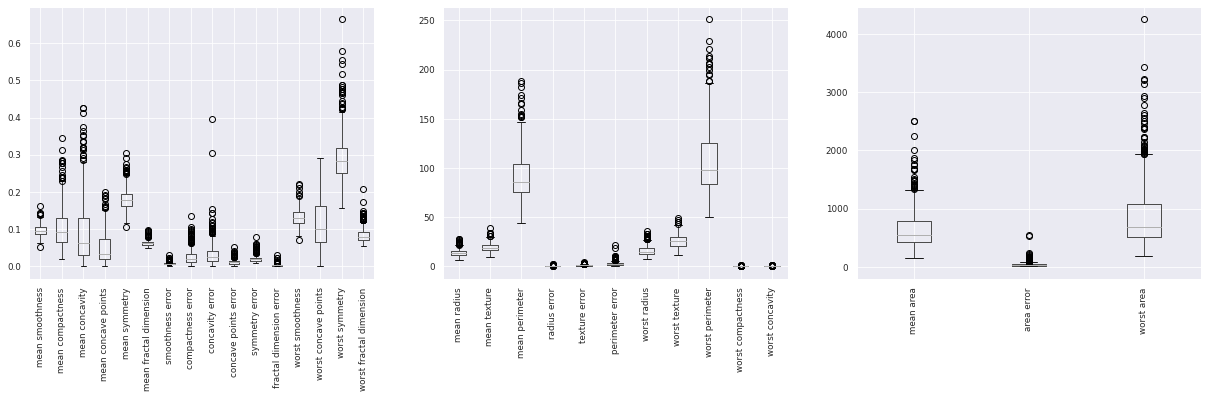

In [ ]:
plt.figure(figsize=(20,5))
ddf = df.drop(['target'],axis=1).describe().transpose()

#-- plot 
fig,(ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3,figsize=(21,5))

df.boxplot(ax= ax1, column=list(ddf[ddf['max'] < 1].transpose().columns))
ax1.xaxis.set_tick_params(rotation=90)

mask = (ddf['max'] > 1) & (ddf['max']<500 )
df.boxplot(ax= ax2, column=list(mask[mask==True].keys()))
ax2.xaxis.set_tick_params(rotation=90)

df.boxplot(ax= ax3, column=list(ddf[ddf['max'] > 500].transpose().columns))
ax3.xaxis.set_tick_params(rotation=90)


plt.show()

## Is there any bad feature?
potential cases:
 1. features with too many outliers
    * symmetry error (11 outliers), also among least corrolated features with the output
 2. features with multiple missing values
    * Not relevant in this dataset
 3. features with very low variance
    * Some features such as smoothness errors are almost constant.


## Q.  Find and retrieve all patients whose data may contain an outlier.

A. Outlier detection (Z-score) based on PCA features

In [ ]:
X = df.drop(['target'],axis=1)
y = df[['target']]

pca = PCA(n_components = 1)#30->1
pca.fit(X)
X_embedded= pca.transform(X)

zScoros= np.abs(scipy.stats.zscore(X_embedded)).flatten()
df_outliers = df
df_outliers['Z-score']=zScoros
df_outliers[df_outliers['Z-score']>3]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,Z-score
82,25.22,24.91,171.5,1878.0,0.10630,0.26650,0.3339,0.18450,0.1829,0.06782,...,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510,0,3.121177
180,27.22,21.87,182.1,2250.0,0.10940,0.19140,0.2871,0.18780,0.1800,0.05770,...,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082,0,4.249262
212,28.11,18.47,188.5,2499.0,0.11420,0.15160,0.3201,0.15950,0.1648,0.05525,...,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525,0,3.555824
236,23.21,26.97,153.5,1670.0,0.09509,0.16820,0.1950,0.12370,0.1909,0.06309,...,206.0,2944.0,0.1481,0.4126,0.5820,0.2593,0.3103,0.08677,0,3.450322
265,20.73,31.12,135.7,1419.0,0.09469,0.11430,0.1367,0.08646,0.1769,0.05674,...,214.0,3432.0,0.1401,0.2644,0.3442,0.1659,0.2868,0.08218,0,3.883548
339,23.51,24.27,155.1,1747.0,0.10690,0.12830,0.2308,0.14100,0.1797,0.05506,...,202.4,2906.0,0.1515,0.2678,0.4819,0.2089,0.2593,0.07738,0,3.461947
352,25.73,17.46,174.2,2010.0,0.11490,0.23630,0.3368,0.19130,0.1956,0.06121,...,229.3,3234.0,0.1530,0.5937,0.6451,0.2756,0.3690,0.08815,0,4.088139
368,21.71,17.25,140.9,1546.0,0.09384,0.08562,0.1168,0.08465,0.1717,0.05054,...,199.5,3143.0,0.1363,0.1628,0.2861,0.1820,0.2510,0.06494,0,3.613280
461,27.42,26.27,186.9,2501.0,0.10840,0.19880,0.3635,0.16890,0.2061,0.05623,...,251.2,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427,0,5.810201
503,23.09,19.83,152.1,1682.0,0.09342,0.12750,0.1676,0.10030,0.1505,0.05484,...,211.5,2782.0,0.1199,0.3625,0.3794,0.2264,0.2908,0.07277,0,3.254562


# Summary of Task 1

1. Data Exploration:
  * No missing value
  * Slightly data imbalanced (~2:1)
  * Visualized data distributions
  * **Multicollinearity** (highly corrolated features) observed 
    * Pair-wise plots, heatmap, corrolation matrix 
    
    * Proposed solutions: PCA, tree-based feature selection

2. Feature Selection 
  * Methods: Corrolation with target, tree-based method, Gini importance, chi2
  * All methods achieved pretty similar rankings 
  *  Most discriminative features include worst perimeter,mean radius, worst concave points, mean perimeter, etc. 
  * Least discriminative features  include symmetry error, texture error, smoothness error, etc.

3. There are might be some potential outliers and inconsistencies in this dataset (should be confirmed with experts)
  * t-SNE, Z-score, and box plot
  * Potential next step: PyOD for outlier detection


# Task 2: Supervised Learning


1.   Train 3 types of classifiers to predict malignancy using all 30 features or a subset based on feature selection. 
2.   Which model performs best? How do you measure which model performs best? Why?

* Metrics:  classification accuracy, confusion matrics, F1-score, percision, recall, AUC curve


## step 1. Pre-processing
* Shuffleing data
* Split the dataset into two training and test sets
* Feature Scaling

In [ ]:
df = shuffle(df) #randomly shuffle data

# Splitting the dataset into the Training/Test sets (70:30)
X_train,X_test, y_train, y_test = train_test_split(df.drop(['target'],axis=1),
                                                   df.target, test_size=0.3)

print(X_train.shape, y_train.shape,  X_test.shape, y_test.shape)

#Feature normalization 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


#split training set into new train/validation (8:2) for hypermaramet tuning 
Xt,X_valid, yt, y_valid = train_test_split(X_train,y_train, test_size=0.2) 

(398, 30) (398,) (171, 30) (171,)


Record performance of each classification method

In [ ]:
dictAcc={} #dictionary of classfication method to its test accuracy
dictCM={} #dictionary of classfication method to its  confusion matrix
dictReport={} # presicion/recall/f1-score

## Classifier 1. k-NN

Hyperparameter tunig through grid search
  * k is number of neighbours

In [ ]:
for k in range(1,10,2): 
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(Xt, yt)
  print('k={}: \t test accuracy={:.3f}'.format(k,knn.score(X_valid, y_valid)))

k=1: 	 test accuracy=0.950
k=3: 	 test accuracy=0.963
k=5: 	 test accuracy=0.963
k=7: 	 test accuracy=0.938
k=9: 	 test accuracy=0.938


In [ ]:
k=3
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Accuracy on test: {:.3f}'.format(accuracy_score(y_test, y_pred)))
dictAcc['knn'] = accuracy_score(y_test, y_pred) #accuracy
dictCM['knn']= confusion_matrix(y_test, y_pred) #confusion matrix
dictReport['knn']=classification_report(y_test, y_pred) #report

Accuracy on test: 0.977


## Classifier 2. SVM

Hyperparameter tunig through grid search
  * C: regularization strength

In [ ]:
#-- C indicates the strength of the classifier is inversely proportional to C)
for c in [0.1**p for p in range(0,5)]:
  linearSVM= svm.LinearSVC(C=c) 
  linearSVM.fit(Xt, yt)
  print('C={:.4f}: \t test accuracy={:.4f}'.format(c,linearSVM.score(X_valid, y_valid)))

C=1.0000: 	 test accuracy=0.9500
C=0.1000: 	 test accuracy=0.9750
C=0.0100: 	 test accuracy=0.9875
C=0.0010: 	 test accuracy=0.9750
C=0.0001: 	 test accuracy=0.9500


In [ ]:
c = 0.01
linearSVM= svm.LinearSVC(C=c) 
linearSVM.fit(X_train, y_train)
y_pred = linearSVM.predict(X_test)

print('Accuracy on test: {:.3f}'.format(accuracy_score(y_test, y_pred)))
dictAcc['svm'] = accuracy_score(y_test, y_pred) #accuracy
dictCM['svm']= confusion_matrix(y_test, y_pred) #confusion matrix
dictReport['svm']=classification_report(y_test, y_pred) #report

Accuracy on test: 0.977


## Classifier 3. Random Forest

Hyperparameter tunig through grid search
 * n: number of trees in the forest

In [ ]:
#-- n is the number of trees in the forest
for n in range(5,50, 2):
  rf = RandomForestClassifier(n_estimators=n, criterion = 'entropy')
  rf.fit(Xt, yt)
  print('n={}: \t test accuracy={:.3f}'.format(n,rf.score(X_valid, y_valid)))

n=5: 	 test accuracy=0.963
n=7: 	 test accuracy=0.938
n=9: 	 test accuracy=0.950
n=11: 	 test accuracy=0.963
n=13: 	 test accuracy=0.950
n=15: 	 test accuracy=0.975
n=17: 	 test accuracy=0.950
n=19: 	 test accuracy=0.950
n=21: 	 test accuracy=0.975
n=23: 	 test accuracy=0.925
n=25: 	 test accuracy=0.975
n=27: 	 test accuracy=0.950
n=29: 	 test accuracy=0.938
n=31: 	 test accuracy=0.938
n=33: 	 test accuracy=0.938
n=35: 	 test accuracy=0.938
n=37: 	 test accuracy=0.963
n=39: 	 test accuracy=0.950
n=41: 	 test accuracy=0.950
n=43: 	 test accuracy=0.950
n=45: 	 test accuracy=0.950
n=47: 	 test accuracy=0.963
n=49: 	 test accuracy=0.950


In [ ]:
n = 15
rf= RandomForestClassifier(n_estimators=n) 
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('Accuracy on test: {:.3f}'.format(accuracy_score(y_test, y_pred)))
dictAcc['rf'] = accuracy_score(y_test, y_pred) #accuracy
dictCM['rf']= confusion_matrix(y_test, y_pred) #confusion matrix
dictReport['rf']=classification_report(y_test, y_pred) #report

Accuracy on test: 0.971


## Report classification results on the test dataset

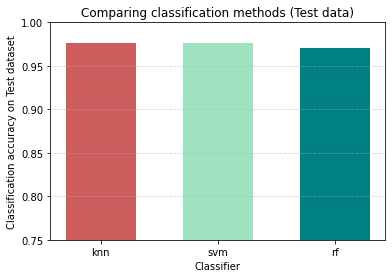

In [ ]:
#-- visualize classification accuracy results
plt.figure(figsize=(6,4))

plt.bar(dictAcc.keys(), dictAcc.values(),
        color =['#CD5C5C','#9FE2BF','Teal'], width = 0.6)
 
plt.ylim((0.75,1.0))
plt.xlabel("Classifier")
plt.ylabel("Classification accuracy on Test dataset")
plt.title("Comparing classification methods (Test data)")
plt.grid(axis = 'y',linestyle = '--',alpha=0.5)
plt.show()

## Confusion Matrix
* Great tool to investigate the classification performace
* The rate of false positive is greater than false positive in all models
  * Might be due to data imbalanced. Models are slighty tend to say the case is malignant becasue the number of malignant cases is greater than benign cases.  


Q: which model was more accurate?

A. SVM

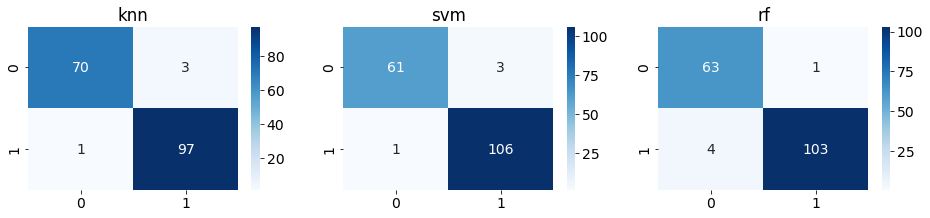

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

plt.rcParams.update({'font.size': 14})
fig, axs = plt.subplots(nrows=1,ncols=3, figsize=(16,3))
for i, (clf, cm) in enumerate(dictCM.items()):
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',ax=axs[i])
  axs[i].set_title(clf)

# Classification Report

In [ ]:
for clf,report in dictReport.items():
  print(clf)
  print(report)
  print(3*'\n')

knn
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        73
           1       0.97      0.99      0.98        98

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171





svm
              precision    recall  f1-score   support

           0       0.98      0.95      0.97        64
           1       0.97      0.99      0.98       107

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171





rf
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        64
           1       0.99      0.96      0.98       107

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



# Summary of Classification task

*  Pre-processed data for classification (shuffle, split, feature normalization )
* Reported accuracy, confusion matrix, percision, recall, and f1-score.
* Classification accuracy of ML classifiers on test set:
 1. **Linear SVM** (0.98)
 2. **random forest** (0.97)
 3. **k-NN,** (0.98)
* All classifiers achieved >**0.95** classification accuracy on the test set